In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

This Project will cover the following sections over this notebook :

- [Data Wrangling](#Wrangling)
- [Data Cleaning](#cleaning)
- [Explaratory data analysis and univariate vasuliazation](#explaratory)
- [Bivariate Visualization](#Bivariate)
- [Multivariate Vasualization](#Mutltivariate)

<a id='Wrangling'></a>

# Data Wrangling

In [2]:
#importing database and explore its columns and rows
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# exploring type of data in each column and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
#exploring descriptive statistics
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
# running a loop to check for unique and null values in each rows
cols = ["duration_sec","start_time","end_time", "start_station_id","start_station_name","start_station_latitude", "start_station_longitude", "end_station_id", "end_station_name", "end_station_latitude", "end_station_longitude", "bike_id","user_type", "member_birth_year", "member_gender", "bike_share_for_all_trip"]
for col in cols:
    x = df[col].nunique()
    y = df[col].isna().sum()
    print("{} unique values are in {} and null values of {}".format(x, col, y))

4752 unique values are in duration_sec and null values of 0
183401 unique values are in start_time and null values of 0
183397 unique values are in end_time and null values of 0
329 unique values are in start_station_id and null values of 197
329 unique values are in start_station_name and null values of 197
334 unique values are in start_station_latitude and null values of 0
335 unique values are in start_station_longitude and null values of 0
329 unique values are in end_station_id and null values of 197
329 unique values are in end_station_name and null values of 197
335 unique values are in end_station_latitude and null values of 0
335 unique values are in end_station_longitude and null values of 0
4646 unique values are in bike_id and null values of 0
2 unique values are in user_type and null values of 0
75 unique values are in member_birth_year and null values of 8265
3 unique values are in member_gender and null values of 8265
2 unique values are in bike_share_for_all_trip and n

In [6]:
#checking for number of rows and columns
df.shape

(183412, 16)

In [7]:
#checking for duplicated rows in the dataset
df.duplicated().sum()

0

### The dataset orginially contains about 183k rows and 16 columns with no duplicated records, while some contain null data but less than 5% of the whole data

<a id='cleaning'></a>
# Data Cleaning

In [8]:
#converting time columns from object to datetime for further easier data extraction 
df["start_time"] = pd.to_datetime(df["start_time"])
df["end_time"] = pd.to_datetime(df["end_time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [9]:
#creating new columns for start and end time in hours and minutes only for further analysis
df["st_hours"] = df["start_time"].dt.hour
df["en_hours"] = df["end_time"].dt.hour
df["st_min"] = df["start_time"].dt.minute
df["en_min"] = df["end_time"].dt.minute
df["Age"] = 2019 - df["member_birth_year"] 

In [10]:
#creating a trip duration column in timedelta64 dtype
df["trip_duration"] = df["end_time"] - df["start_time"]
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   duration_sec             183412 non-null  int64          
 1   start_time               183412 non-null  datetime64[ns] 
 2   end_time                 183412 non-null  datetime64[ns] 
 3   start_station_id         183215 non-null  float64        
 4   start_station_name       183215 non-null  object         
 5   start_station_latitude   183412 non-null  float64        
 6   start_station_longitude  183412 non-null  float64        
 7   end_station_id           183215 non-null  float64        
 8   end_station_name         183215 non-null  object         
 9   end_station_latitude     183412 non-null  float64        
 10  end_station_longitude    183412 non-null  float64        
 11  bike_id                  183412 non-null  int64          
 12  us

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,st_hours,en_hours,st_min,en_min,Age,trip_duration
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,17,8,32,1,35.0,0 days 14:29:45.830000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,18,6,53,42,NaN,0 days 11:48:41.267000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,12,5,13,24,47.0,0 days 17:10:54.928000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,17,4,54,2,30.0,0 days 10:08:10.832000
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,23,0,54,20,45.0,0 days 00:26:25.525000


In [11]:
#creating new columns for the whole route by combining start and end stations
df["full_route"] = df["start_station_name"].astype(str) + " to " + df["end_station_name"].astype(str)
df["full_route_id"] = df["start_station_id"].astype(str) + " to " + df["end_station_id"].astype(str)

In [12]:
#converting trip duration from seconds to minutes
df["duration_min"] = df.duration_sec/60
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,st_hours,en_hours,st_min,en_min,Age,trip_duration,duration_min
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412,183412.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,13.458421,13.614769,29.451317,29.670256,34.193563,0 days 00:12:06.577548164,12.101307
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,4.724978,4.739638,17.368447,17.441214,10.116689,0 days 00:29:54.388971051,29.906496
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0 days 00:01:01.081000,1.016667
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,9.000000,9.000000,14.000000,15.000000,27.000000,0 days 00:05:25.428500,5.416667
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,14.000000,14.000000,29.000000,30.000000,32.000000,0 days 00:08:34.649500,8.566667
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,17.000000,18.000000,45.000000,45.000000,39.000000,0 days 00:13:16.317000,13.266667
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000,23.000000,59.000000,59.000000,141.000000,0 days 23:44:04.830000,1424.066667


In [13]:
#checking for unique value counts in age column
df.Age.value_counts()

31.0     10236
26.0      9325
30.0      8972
29.0      8658
28.0      8498
         ...  
91.0         1
89.0         1
109.0        1
141.0        1
92.0         1
Name: Age, Length: 75, dtype: int64

In [14]:
#creating a variable for checking all member ages then sorting them ascendingly in the next cell
x= df.Age.unique()

In [15]:
x.sort()
x

array([ 18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,
        29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,
        40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,
        51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,
        62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
        73.,  74.,  75.,  76.,  77.,  78.,  80.,  81.,  85.,  86.,  88.,
        89.,  91.,  92.,  99., 109., 117., 118., 119., 141.,  nan])

<a id='explaratory'></a>

# Explaratory data analysis and univariate vasuliazation

## What are the most common routes ?
### There are about 24k routes which members
### the top 20 routes account only for about 2.7% of the whole trips therefore it has no practical singnifcance to analyze it unless other variables are introduced
#### Berry St at 4th St to San Francisco Ferry Building is the most common one but with only 0.2% of the whole routes

In [16]:
#check for number of unique routes which members take
df.full_route_id.nunique()

23649

In [17]:
#introducing a variable for the top 20 routes then calculate their percentage of the whole trips
top20_routes = df.full_route.value_counts()[:20]

In [18]:
top20_routes.sum()/len(df.full_route)*100

2.7222864370924476

In [19]:
#introducing a variable for the top route taken then calculate its percentage of the whole trips
df.full_route.value_counts()

Berry St at 4th St to San Francisco Ferry Building (Harry Bridges Plaza)               337
San Francisco Ferry Building (Harry Bridges Plaza) to The Embarcadero at Sansome St    314
Grand Ave at Perkins St to 19th Street BART Station                                    310
The Embarcadero at Sansome St to Steuart St at Market St                               285
19th Street BART Station to Grand Ave at Perkins St                                    284
                                                                                      ... 
Isabella St at San Pablo Ave to Fruitvale BART Station                                   1
Folsom St at 9th St to O'Farrell St at Divisadero St                                     1
Fountain Alley at S 2nd St to Pierce Ave at Market St                                    1
Franklin St at 9th St to San Pablo Ave at 27th St                                        1
5th St at Brannan St to S Park St at 3rd St                                              1

In [20]:
df.full_route.value_counts()[0]/len(df.full_route)*100

0.18373934093734323

## Is there a difference in gender distribution ?

### males are more than females in both subscribers and customers

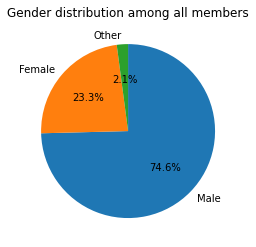

In [21]:
gen_count = df.member_gender.value_counts()
plt.pie(gen_count, labels = gen_count.index, startangle = 90, counterclock = False,autopct='%1.1f%%')
plt.title("Gender distribution among all members");

## What is the age distribution?

### Most Members are between 20 and 40 years old

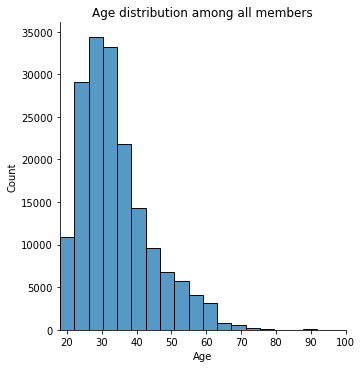

In [22]:
sb.displot(df["Age"], kind = 'hist', bins = 30)
plt.xlim(18,100)
plt.title("Age distribution among all members");

In [23]:
df.bike_id.nunique()

4646

In [24]:
df.bike_id.value_counts()

4794    191
4814    176
4422    174
5014    174
5175    173
       ... 
2306      1
1930      1
776       1
540       1
2148      1
Name: bike_id, Length: 4646, dtype: int64

In [25]:
top20_bikes = df.bike_id.value_counts()[:20]
top20_bikes.sum()/df.bike_id.value_counts().sum()*100

1.8570213508385491

In [26]:
top50_bikes = df.bike_id.value_counts()[:50]
top50_bikes.sum()/df.bike_id.value_counts().sum()*100

4.425010359191329

### Neither the top 20 nor top 50 bikes account for significant statistical insight

## What is the average trip duration?

### The most frequent duration for trips is between 3 and 9 minutes

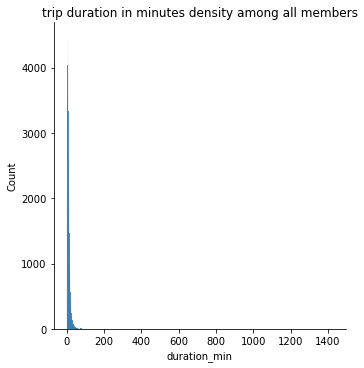

In [27]:
sb.displot(df['duration_min'])
plt.title("trip duration in minutes density among all members");

In [28]:
df.duration_min.nunique()

4752

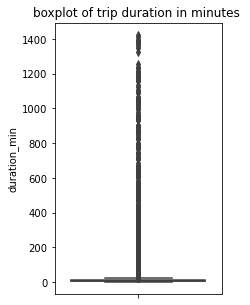

In [29]:


base_color = sb.color_palette()[0]
plt.figure(figsize = [3, 5])
sb.boxplot(y = df['duration_min'],color=base_color)
plt.title("boxplot of trip duration in minutes ");

In [30]:
df_duration = df.query("duration_min < 50")
df_duration.shape[0]/df.shape[0]*100

98.7334525549037

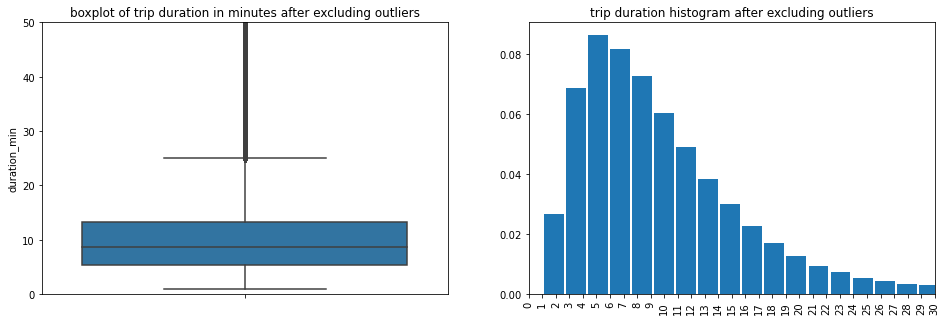

In [43]:
plt.figure(figsize = [16, 5])
plt.subplot(1, 2, 1)

sb.boxplot(y = df['duration_min'],color=base_color)
plt.ylim((0,50))
plt.title("boxplot of trip duration in minutes after excluding outliers");

plt.subplot(1, 2, 2)

plt.hist(data = df_duration, x = 'duration_min', bins = 30, rwidth = 0.9, density = True)
plt.xlim(0,30)
x_ticks = (np.arange(0, 31, step=1))
plt.xticks(ticks=x_ticks, rotation = 90)
plt.title("trip duration histogram after excluding outliers");

## Peak time analysis

### Most rides take place at two intervals ; between 8 to 9 am and between 5 to 6 pm

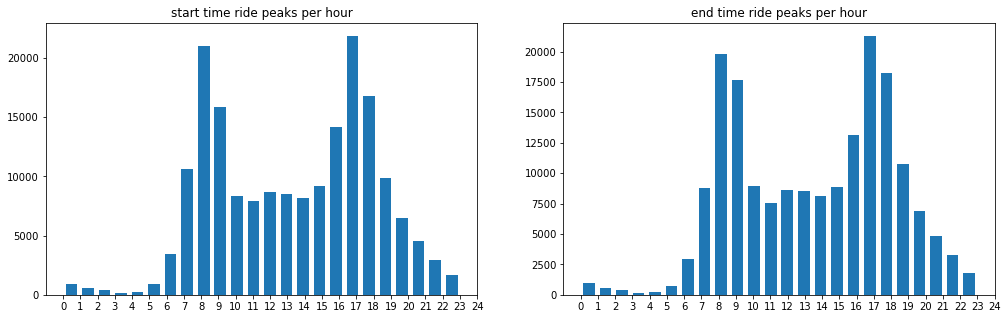

In [33]:

plt.figure(figsize = [17, 5]) 


plt.subplot(1,2,1)
plt.hist(x = df["st_hours"], bins = 24, rwidth = 0.7)
x_ticks = (np.arange(0, 25, step=1))
plt.xticks(ticks=x_ticks)
plt.title("start time ride peaks per hour");


plt.subplot(1,2,2)
plt.hist(x = df["en_hours"], bins = 24, rwidth = 0.7)
x_ticks = (np.arange(0, 25, step=1))
plt.xticks(ticks=x_ticks)
plt.title("end time ride peaks per hour");


### no significant difference in the minutes where rides start and end

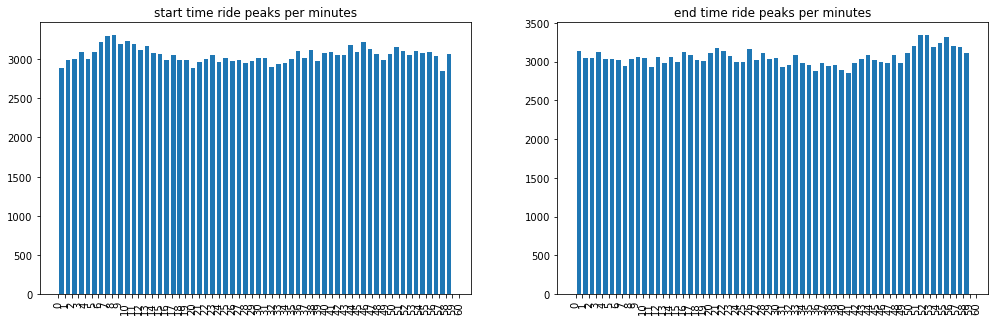

In [34]:
plt.figure(figsize = [17, 5])

plt.subplot(1,2,1)
plt.hist(x = df["st_min"], bins = 60, rwidth = 0.7)
x_ticks = (np.arange(0, 61, step=1))
plt.xticks(ticks=x_ticks, rotation = 90)
plt.title("start time ride peaks per minutes");

plt.subplot(1,2,2)
plt.hist(x = df["en_min"], bins = 60, rwidth = 0.7)
x_ticks = (np.arange(0, 61, step=1))
plt.xticks(ticks=x_ticks, rotation = 90)
plt.title("end time ride peaks per minutes");


<a id='Bivariate'></a>

# Bivariate Visualization

## Correlation analysis

### No significant correlation could be observed between differenet variables

In [35]:
x = df.corr()
x.style.background_gradient(cmap='coolwarm')

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,st_hours,en_hours,st_min,en_min,Age,duration_min
duration_sec,1.000000,-0.008652,0.010513,-0.037930,0.003064,0.010873,-0.038906,-0.006133,-0.006027,0.006645,0.004388,-0.003398,0.001029,0.006027,1.000000
start_station_id,-0.008652,1.000000,-0.190978,0.459169,0.336227,-0.179771,0.466755,-0.064677,0.115115,0.012272,0.010674,0.000814,0.002018,-0.115115,-0.008652
start_station_latitude,0.010513,-0.190978,1.000000,-0.677227,-0.179727,0.989969,-0.682637,0.049996,-0.075826,-0.017101,-0.016514,-0.001344,-0.002863,0.075826,0.010513
start_station_longitude,-0.037930,0.459169,-0.677227,1.000000,0.479688,-0.681815,0.992410,-0.141782,0.125590,0.053245,0.049736,-0.003071,-0.004989,-0.125590,-0.037930
end_station_id,0.003064,0.336227,-0.179727,0.479688,1.000000,-0.197992,0.469027,-0.054607,0.112709,0.090772,0.089351,0.001524,-0.002507,-0.112709,0.003064
end_station_latitude,0.010873,-0.179771,0.989969,-0.681815,-0.197992,1.000000,-0.684197,0.049244,-0.075927,-0.033929,-0.033072,-0.001025,-0.002702,0.075927,0.010873
end_station_longitude,-0.038906,0.466755,-0.682637,0.992410,0.469027,-0.684197,1.000000,-0.143527,0.126421,0.033620,0.030163,-0.001978,-0.003500,-0.126421,-0.038906
bike_id,-0.006133,-0.064677,0.049996,-0.141782,-0.054607,0.049244,-0.143527,1.000000,0.036145,0.016488,0.016320,0.002184,0.003033,-0.036145,-0.006133
member_birth_year,-0.006027,0.115115,-0.075826,0.125590,0.112709,-0.075927,0.126421,0.036145,1.000000,0.064090,0.062263,-0.003123,-0.003568,-1.000000,-0.006027
st_hours,0.006645,0.012272,-0.017101,0.053245,0.090772,-0.033929,0.033620,0.016488,0.064090,1.000000,0.981298,-0.067989,-0.024037,-0.064090,0.006645


### in average, female members are younger than males while others are the oldest

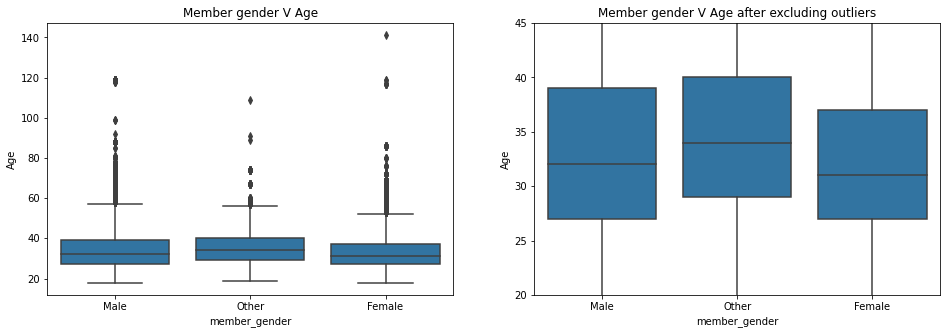

In [36]:
plt.figure(figsize = [16, 5])
plt.subplot(1, 2, 1)
sb.boxplot(data=df, x='member_gender', y='Age', color=base_color)
plt.title("Member gender V Age");

plt.subplot(1, 2, 2)
sb.boxplot(data=df, x='member_gender', y='Age', color=base_color)
plt.title("Member gender V Age after excluding outliers");
plt.ylim(20,45);

## does being a customer or subscriber will change the gender distribution ?

### Males are more than females in both customers and subscribers while others are the least in both

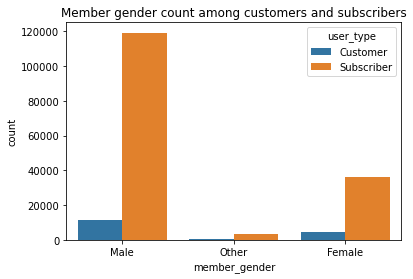

In [37]:
sb.countplot(data = df, x = 'member_gender', hue = 'user_type');
plt.title("Member gender count among customers and subscribers");

## Is there a difference in age between subscribers and customers?

### No difference in Age between subscribers and customers

(15.0, 70.0)

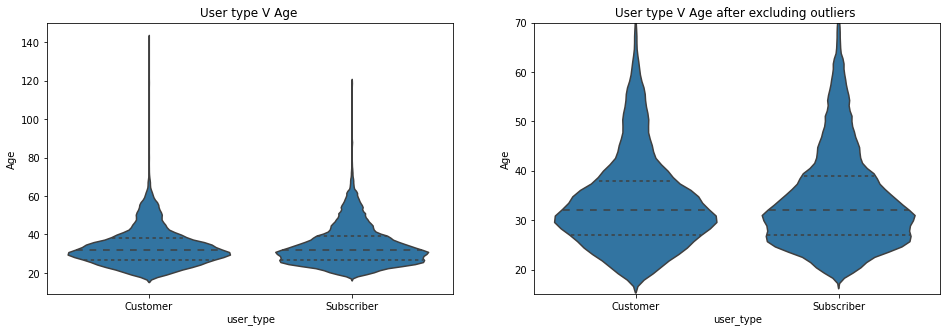

In [38]:
plt.figure(figsize = [16, 5])
plt.subplot(1, 2, 1)
sb.violinplot(data=df, x='user_type', y='Age', color=base_color, inner='quartile');
plt.title("User type V Age ");

plt.subplot(1, 2, 2)
sb.violinplot(data=df, x='user_type', y='Age', color=base_color, inner='quartile');
plt.title("User type V Age after excluding outliers ");
plt.ylim(15, 70)

## Does age affect trip duration ?

### Members in age range between 20 and 40 years old take longer time in trips

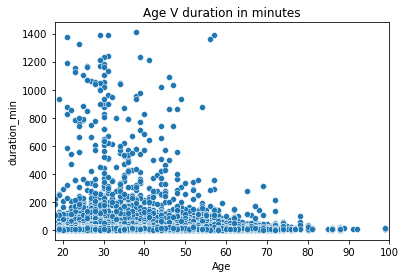

In [39]:
sb.scatterplot(data = df, x = 'Age', y = 'duration_min');
plt.xlim(18,100);
plt.title("Age V duration in minutes");

<a id='Mutltivariate'></a>

# Multivariate Visualization 

## Does being a customer or subscriber change the relation between age and trip durations ?

### No signifcant difference between customers and subscribers of same age in trip duration

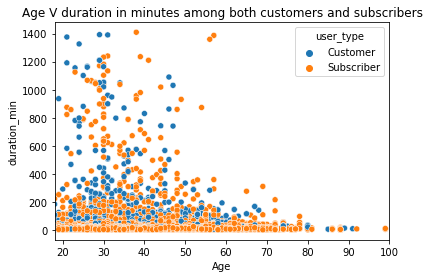

In [40]:
sb.scatterplot(data = df, x = 'Age', y = 'duration_min',hue = 'user_type');
plt.xlim(18, 100);
plt.title("Age V duration in minutes among both customers and subscribers");

## What is the relation between start hours of the trip, duration among customers and subscribers ?

### Customers take longer trip durations than suscribers with the peak between 1 and 4 am

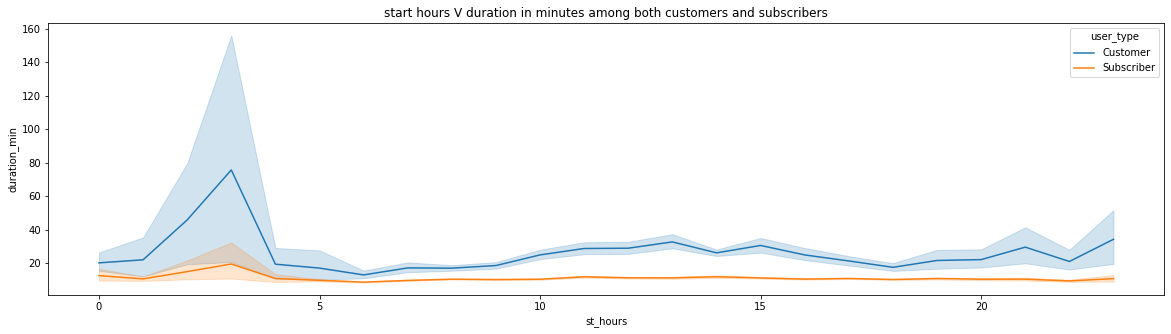

In [41]:
plt.figure(figsize = [20,5]);
sb.lineplot(data = df, x = 'st_hours', y = 'duration_min', hue = 'user_type');
plt.title("start hours V duration in minutes among both customers and subscribers");

## What is the relation between start hours of the trip, duration among differenet genders?

### people of other genders take longer trip duration than females while males are the least

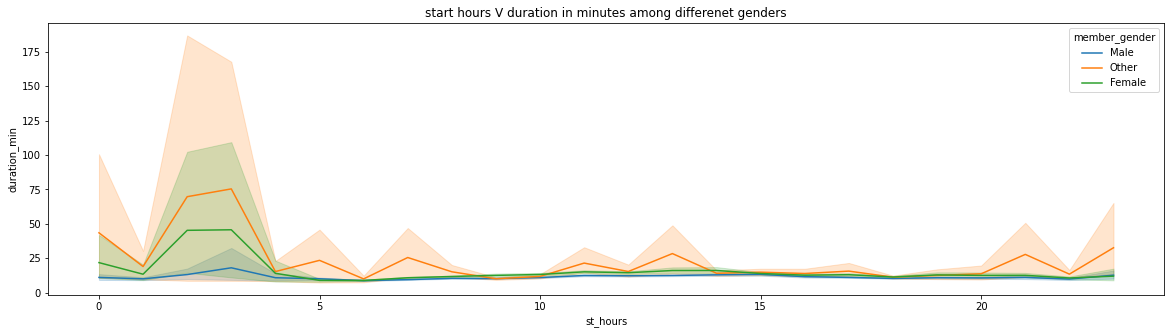

In [42]:
plt.figure(figsize = [20,5]);
sb.lineplot(data = df, x = 'st_hours', y = 'duration_min', hue = 'member_gender');
plt.title("start hours V duration in minutes among differenet genders");